# Chain-of-Thought

- Chain-of-thought reasoning (CoT) is a method of guiding LLMs through a series of
  steps or logical connections to reach a conclusion or solve a problem.

- [CoT](https://arxiv.org/abs/2201.11903) is asking an LLM to think through complex problems, breaking them down into
  smaller, more manageable components. This allows the LLM to focus on each part
  individually, ensuring a more thorough understanding of the issue at hand.

Process:

1. Asking an LLM to provide explanations for its decisions
2. Planning multiple steps before deciding on a final answer


### Ineffective CoT Example

Input:

- Create a marketing plan for a new software product.

Output:

1. Launch social media campaign
2. Send out email newsletters
3. Offer limited-time discounts
4. Collaborate with influencers
5. Organize webinars

In this example, GPT-4 doesn’t use chain-of-thought reasoning, and it does not
address the specific aspects of the marketing plan. The LLM generates a generic list
of marketing strategies that could apply to any product, rather than focusing on the
unique characteristics of the new software product.


## Effective CoT Example

Input:

- Create a detailed marketing plan for a new project management software
  product targeting small and medium-sized businesses.

- The budget is $20,000, and we want to focus on digital marketing channels.

- Consider the success of similar products in the market and provide a
  step-by-step plan that includes the most effective promotional tactics.

Output:

Market Research

1. Analyze competitors and their marketing strategies
2. Identify the unique selling points of the new project management software
3. Define the target audience and their pain points

Branding and Messaging

1. Develop a consistent brand identity
2. Craft compelling messaging that addresses the target audience's pain
   points
3. Create marketing assets such as website, blog, and social media content

...

Email Marketing

1. Develop an email marketing strategy to nurture leads and convert them
   into customers
2. Send personalized onboarding emails to new users with helpful tips and
   resources

- Take note of the phrase step-by-step, a critical element in CoT. By
  incorporating this phrase into your prompt, you’re asking the LLM
  to reason through the steps that are required to generate a highly
  effective software product.
  Also, by providing a $20,000 budget and the type of software,
  GPT-4 is able to provide a much more relevant and contextualized
  response.


# Agents

- agent acts, perceives, and makes decisions within a specified environment to achieve predefined objectives
- Agents can take various actions such as executing a Python function; afterward, the
- Agent will observe what happens and will decide on whether it is finished or what
  action to take next.
  The agent will continously loop through a series of actions and observations until
  there are no further actions, as you can see in the following pseudocode:

```python
next_action = agent.get_action(...)
while next_action != AgentFinish:
 observation = run(next_action)
 next_action = agent.get_action(..., next_action, observation)
return next_action
```


1. Inputs

- These are the sensory stimuli or data points the agent receives from its environment. Inputs can be diverse, ranging from visual (like images) and auditory (like
  audio files) to thermal signals and beyond.

EG: The car’s sensors, such as cameras, LIDAR, and ultrasonic sensors, provide a
continuous stream of data about the environment. This can include information
about nearby vehicles, pedestrians, road conditions, and traffic signals.

2. Goal or reward function

- This represents the guiding principle for an agent’s actions. In goal-based frameworks, the agent is tasked with reaching a specific end state. In a reward-based
  setting, the agent is driven to maximize cumulative rewards over time, often in
  dynamic environments.

EG: The primary goal for a self-driving car is safe and efficient navigation from point A to point B. If we were to use a reward-based system, the car might receive
positive rewards for maintaining a safe distance from other objects, adhering
to speed limits, and following traffic rules. Conversely, it could receive negative
rewards for risky behaviors, like hard braking or veering off the lane. Tesla
specifically uses miles driven without an intervention as their reward function.

3. Available actions

- The action space is the range of permissible actions an agent can undertake at any
  given moment. The breadth and nature of this space are contingent upon the task
  at hand.

EG: The car’s action space includes accelerating, decelerating, turning, changing
lanes, and more. Each action is chosen based on the current input data and
the objective defined by the goal or reward function.


1. Inputs

- For LLMs, the gateway is primarily through text. But that doesn’t restrain the
  wealth of information you can use. Whether you’re dealing with thermal readings, musical notations, or intricate data structures, your challenge lies in molding these into textual representations suitable for an LLM. Think about videos:
  while raw footage might seem incompatible, video text transcriptions allow an
  LLM to extract insights for you.

2. Harnessing goal-driven directives

- LLMs primarily use goals defined within your text prompts. By creating effective
  prompts with objectives, you’re not just accessing the LLM’s vast knowledge;
  you’re effectively charting its reasoning path. Think of it as laying down a
  blueprint: your specific prompt instructs the model, guiding it to dissect your
  overarching objective into a systematic sequence of steps.

3. Crafting action through functional tools

- LLMs are not limited to mere text generation; there’s so much more you can
  achieve. By integrating ready-made tools or custom-developed tools, you can equip
  LLMs to undertake diverse tasks, from API calls to database engagements or
  even orchestrating external systems. Tools can be written in any programming
  language, and by adding more tools you are effectively expanding the action space
  of what an LLM can achieve.

4. Memory

- It’s ideal to store state between agent steps; this is particularly useful for chatbots, where remembering the previous chat history provides a better user experience.

5. Agent planning/execution strategies

- There are multiple ways to achieve a high-level goal, of which a mixture of
  planning and executing is essential.

6. Retrieval

- LLMs can use different types of retrieval methods. Semantic similarity within
  vector databases is the most common, but there are others such as including
  custom information from a SQL database into prompts.


# Reason and Act (ReAct)

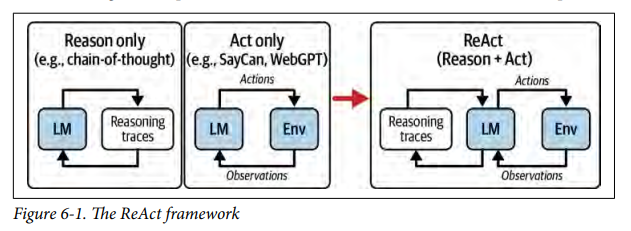

The ReAct framework uses a mixture of task decomposition, a thought loop, and
multiple tools to solve questions

1. Observe the environment.
2. Interpret the environment with a thought.
3. Decide on an action.
4. Act on the environment.
5. Repeat steps 1–4 until you find a solution or you’ve done too many iterations (the solution is “I’ve found the answer”).


You can easily create a ReAct-style prompt by using the preceding thought loop while
also providing the LLM with several inputs such as:

- {question}: The query that you want answered.
- {tools}: These refer to functions that can be used to accomplish a step within
  the overall task. It is common practice to include a list of tools where each tool is a Python function, a name, and a description of the function and its purpose.

The following is a prompt that implements the ReAct pattern:

You will attempt to solve the problem of finding the answer to a question.
Use chain-of-thought reasoning to solve through the problem, using the
following pattern:

1. Observe the original question:

- original_question: original_problem_text

2. Create an observation with the following pattern:

- observation: observation_text

3. Create a thought based on the observation with the following pattern:

- thought: thought_text

4. Use tools to act on the thought with the following pattern:

- action: tool_name
- action_input: tool_input

Do not guess or assume the tool results. Instead, provide a structured
output that includes the action and action_input.

You have access to the following tools: {tools}.

original_problem: {question}

Based on the provided tool result:

Either provide the next observation, action, action_input, or the final
answer if available.

If you are providing the final answer, you must return the following pattern:
"I've found the answer: final_answer"


# Reason and Act Implementation


In [2]:
import re

# Sample text:
text = """
Action: search_on_google
Action_Input: Tom Hanks's current wife

action: search_on_wikipedia
action_input: How old is Rita Wilson in 2023

action : search_on_google
action input: some other query
"""

# Compile regex patterns:
action_pattern = re.compile(r"(?i)action\s*:\s*([^\n]+)", re.MULTILINE)
action_input_pattern = re.compile(r"(?i)action\s*_*input\s*:\s*([^\n]+)",
                                  re.MULTILINE)

# Find all occurrences of action and action_input:
actions = action_pattern.findall(text)
action_inputs = action_input_pattern.findall(text)

# Extract the last occurrence of action and action_input:
last_action = actions[-1] if actions else None
last_action_input = action_inputs[-1] if action_inputs else None

print("Last Action:", last_action)
print("Last Action Input:", last_action_input)

Last Action: search_on_google
Last Action Input: some other query


- action_pattern = re.compile(r"(?i)action\s*:\s*([^\n]+)", re.MULTI
  LINE)

- (?i): This is called an inline flag and makes the regex pattern case-insensitive.
  It means that the pattern will match “action,” “Action,” “ACTION,” or any other
  combination of uppercase and lowercase letters

- action: This part of the pattern matches the word action literally. Due to the
  case-insensitive flag, it will match any capitalization of the word.

- \s\*: This part of the pattern matches zero or more whitespace characters (spaces,
  tabs, etc.). The \* means zero or more, and \s is the regex shorthand for a
  whitespace character.

- : This part of the pattern matches the colon character literally.

- \s\*: This is the same as the previous \s\* part, matching zero or more white‐
  space characters after the colon.

- +([^\n]++): This pattern is a capturing group, denoted by the parentheses. It
  matches one or more characters that are not a newline character. The ^ inside
  the square brackets [] negates the character class, and \n represents the newline
  character. The + means one or more. The text matched by this group will be
  extracted when using the findall() function.

- re.MULTILINE: This is a flag passed to re.compile() function. It tells the regex
  engine that the input text may have multiple lines, so the pattern should be
  applied line by line.

- In regular expressions, square brackets [] are used to define a character class,
  which is a set of characters that you want to match. For example, [abc] would
  match any single character that is either 'a', 'b', or 'c'.

- When you add a caret ^ at the beginning of the character class, it negates the
  character class, meaning it will match any character that is not in the character
  class. In other words, it inverts the set of characters you want to match.

- So, when we use [^abc], it will match any single character that is not 'a', 'b',
  or 'c'. In the regex pattern +([^\n]++), the character class is [^n], which means
  it will match any character that is not a newline character (\n). The + after
  the negated character class means that the pattern should match one or more
  characters that are not newlines.

- By using the negated character class [^n] in the capturing group, we ensure that
  the regex engine captures text up to the end of the line without including the
  newline character itself. This is useful when we want to extract the text after the
  word action or action input up to the end of the line.


In [4]:
def extract_last_action_and_input(text):
    # Compile regex patterns
    action_pattern = re.compile(r"(?i)action\s*:\s*([^\n]+)", re.MULTILINE)
    action_input_pattern = re.compile(
        r"(?i)action\s*_*input\s*:\s*([^\n]+)", re.MULTILINE
    )

    # Find all occurrences of action and action_input
    actions = action_pattern.findall(text)
    action_inputs = action_input_pattern.findall(text)

    # Extract the last occurrence of action and action_input
    last_action = actions[-1] if actions else None
    last_action_input = action_inputs[-1] if action_inputs else None

    return {"action": last_action, "action_input": last_action_input}


extract_last_action_and_input(text)

{'action': 'search_on_google', 'action_input': 'some other query'}

In [5]:
def extract_final_answer(text):
    final_answer_pattern = re.compile(
        r"(?i)I've found the answer:\s*([^\n]+)", re.MULTILINE
    )

    final_answers = final_answer_pattern.findall(text)

    if final_answers:
        return final_answers[0]
    else:
        return None


final_answer_text = "I've found the answer: final_answer"
print(extract_final_answer(final_answer_text))

final_answer


### Langchain Implementation


In [44]:
from langchain_openai.chat_models import ChatOpenAI
from langchain.prompts.chat import SystemMessagePromptTemplate

In [45]:
# Adding a stop sequence forces an LLM to stop generating new tokens after encounting the phrase "tool_result:",  This helps by stopping hallucinations for tool usage.
chat = ChatOpenAI(stop=["tool_result:"],  model="gpt-4o")

In [46]:
tools = {}


def search_on_google(query: str):
    return f"Jason Derulo doesn't have a wife or partner."


tools["search_on_google"] = {
    "function": search_on_google,
    "description": "Searches on google for a query",
}

In [47]:
base_prompt = """
You will attempt to solve the problem of finding the answer to a question.
Use chain-of-thought reasoning to solve through the problem, using the
following pattern:

1. Observe the original question:
original_question: original_problem_text
2. Create an observation with the following pattern:
observation: observation_text
3. Create a thought based on the observation with the following pattern:
thought: thought_text
4. Use tools to act on the thought with the following pattern:
action: tool_name
action_input: tool_input

Do not guess or assume the tool results. Instead, provide a structured
output that includes the action and action_input.

You have access to the following tools: {tools}.

original_problem: {question}
"""

In [48]:
output = chat.invoke(SystemMessagePromptTemplate
                     .from_template(template=base_prompt)
                     .format_messages(tools=tools, question="Is Jason Derulo with a partner?"))

print(output)

content='1. Observe the original question:\noriginal_question: Is Jason Derulo with a partner?\n\n2. Create an observation with the following pattern:\nobservation: The question is asking about the current relationship status of Jason Derulo.\n\n3. Create a thought based on the observation with the following pattern:\nthought: I need to search for the most recent information about Jason Derulo\'s relationship status.\n\n4. Use tools to act on the thought with the following pattern:\naction: search_on_google\naction_input: "Jason Derulo current relationship status 2023"' response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 196, 'total_tokens': 308}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_df84d6bd70', 'finish_reason': 'stop', 'logprobs': None} id='run-0c513f2b-41dd-4384-8a03-feebf677cf98-0' usage_metadata={'input_tokens': 196, 'output_tokens': 112, 'total_tokens': 308}


In [49]:
tool_name = extract_last_action_and_input(output.content)["action"]
tool_input = extract_last_action_and_input(output.content)["action_input"]
tool_result = tools[tool_name]["function"](tool_input)

In [50]:
print(f"""The agent has opted to use the following tool:
tool_name: {tool_name}
tool_input: {tool_input}
tool_result: {tool_result}"""
      )

The agent has opted to use the following tool:
tool_name: search_on_google
tool_input: "Jason Derulo current relationship status 2023"
tool_result: Jason Derulo doesn't have a wife or partner.


In [51]:
current_prompt = """
You are answering this query: Is Jason Derulo with a partner?
Based on the provided tool result:
tool_result: {tool_result}
Either provide the next observation, action, action_input, or the final
answer if available. If you are providing the final answer, you must return
the following pattern: "I've found the answer: final_answer"
"""

In [52]:
output = chat.invoke(SystemMessagePromptTemplate.
                     from_template(template=current_prompt)
                     .format_messages(tool_result=tool_result))

print(output)

content="I've found the answer: final_answer. Jason Derulo doesn't have a wife or partner." response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 86, 'total_tokens': 104}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_3aa7262c27', 'finish_reason': 'stop', 'logprobs': None} id='run-3ed71959-b2e1-4edc-9d41-9aee3bb3647a-0' usage_metadata={'input_tokens': 86, 'output_tokens': 18, 'total_tokens': 104}


In [53]:
print("----------\n\nThe model output is:", output.content)
final_answer = extract_final_answer(output.content)

if final_answer:
    print(f"answer: {final_answer}")
else:
    print("No final answer found.")

----------

The model output is: I've found the answer: final_answer. Jason Derulo doesn't have a wife or partner.
answer: final_answer. Jason Derulo doesn't have a wife or partner.


# Using Tools

A common part of an agent’s prompt will likely include the following:

- You are looking to accomplish: {goal}
- You have access to the following {tools}

Writing expressive names for your Python functions and tool
descriptions will increase an LLM’s ability to effectively choose the
right tools


In [54]:
# Import necessary classes and functions:
from langchain.agents import AgentExecutor, create_react_agent
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain.tools import Tool

# Defining the LLM to use:
model = ChatOpenAI()

# Function to count the number of characters in a string:


def count_characters_in_string(string):
    return len(string)


# Create a list of tools:
# Currently, only one tool is defined that counts characters in a text string.
tools = [
    Tool.from_function(
        func=count_characters_in_string,
        name="Count Characters in a text string",
        description="Count the number of characters in a text string",
    )
]

# Download a react prompt!
prompt = hub.pull("hwchase17/react")

# Construct the ReAct agent:
agent = create_react_agent(model, tools, prompt)

# Initialize an agent with the defined tools and
# Create an agent executor by passing in the agent and tools:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Invoke the agent with a query to count the characters in the given word:
agent_executor.invoke({"input": '''How many characters are in the word
"supercalifragilisticexpialidocious"?'''})

/home/fulim/learning/langchain-vector_db/langchain-vector_db/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(




> Entering new AgentExecutor chain...
I should count the characters in the word "supercalifragilisticexpialidocious"
Action: Count Characters in a text string
Action Input: supercalifragilisticexpialidocious34I now know the final answer
Final Answer: 34

> Finished chain.


{'input': 'How many characters are in the word\n"supercalifragilisticexpialidocious"?',
 'output': '34'}

# Using LLMs as an API (OpenAI Functions)
